# Diagnostic video

Converting sequences of night sky images into time-lapse videos provides astronomers with a powerful diagnostic tool. These videos reveal evolving patterns in seeing conditions, tracking accuracy, cloud coverage, and equipment performance that might be missed when examining individual frames.

In this tutorial, we'll transform the calibrated astronomical images from the [calibration tutorial](calibration) into a time-lapse video of the night.


## Selecting and sorting the files

Let's start by retrieving our files

In [1]:
from glob import glob

images = glob("calibrated_images/*.fits")

and sort them by observation time

In [2]:
from astropy.io import fits
from dateutil import parser


def observation_time(file):
    date_str = fits.getheader(file)["DATE-OBS"]
    return parser.parse(date_str)


# order by observation time
images = sorted(images, key=lambda file: observation_time(file))

## Making a video

We can now create a small function to show an image and some other info.

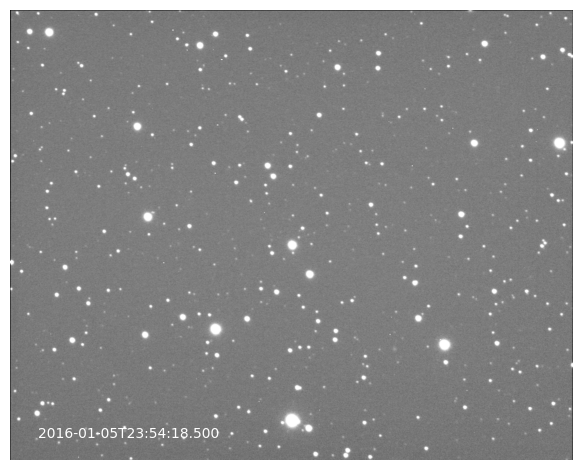

In [3]:
import matplotlib.pylab as plt
from eloy import viz


def show_image(file):
    data = fits.getdata(file)
    header = fits.getheader(file)
    plt.imshow(viz.z_scale(data), cmap="Greys_r", origin="lower")
    plt.text(
        0.05, 0.05, header["DATE-OBS"], color="white", transform=plt.gca().transAxes
    )
    plt.axis("off")
    plt.gcf().patch.set_alpha(0.0)
    plt.tight_layout()


show_image(images[0])

Let's use that to make a video of the night directly in the ipython notebook. We'll only run if for the $n$ first images

In [4]:
import matplotlib.animation as animation
from IPython import display
import imageio.v2 as imageio
import io

FPS = 10
show_image(images[0])
im = plt.gcf().axes[0].images[0]


def update(frame):
    plt.gca().clear()
    buf = io.BytesIO()
    show_image(images[frame])
    plt.savefig(buf)
    im_data = imageio.imread(buf)
    im.set_array(im_data)
    return [im]


ani = animation.FuncAnimation(fig=plt.gcf(), func=update, frames=10, interval=1000 / FPS)
video = ani.to_jshtml(embed_frames=True)
html = display.HTML(video)
plt.close()
display.display(html)